# QCD Running Coupling $\alpha_s(\mu)$

This notebook demonstrates the `qcd` module, which computes the strong coupling constant at arbitrary energy scales via numerical RG evolution of the $\overline{\text{MS}}$ beta function.

The coupling runs according to

$$
\mu^2 \frac{d\alpha_s}{d\mu^2} = -\frac{\alpha_s^2}{4\pi}\left[\beta_0 + \beta_1 \frac{\alpha_s}{4\pi} + \beta_2 \left(\frac{\alpha_s}{4\pi}\right)^{\!2} + \cdots\right]
$$

with $\beta_0 = 11 - \tfrac{2}{3}n_f$, $\beta_1 = 102 - \tfrac{38}{3}n_f$, etc. The number of active flavors $n_f$ changes at quark mass thresholds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qcd import alpha_s, alpha_s_array, ALPHA_S_MZ, M_Z, M_TOP

## 1. $\alpha_s$ vs energy scale

We evolve $\alpha_s$ from $M_Z = 91.19$ GeV up to 20 TeV at 3-loop order, crossing the top quark threshold at $m_t = 172.69$ GeV where $n_f$ changes from 5 to 6.

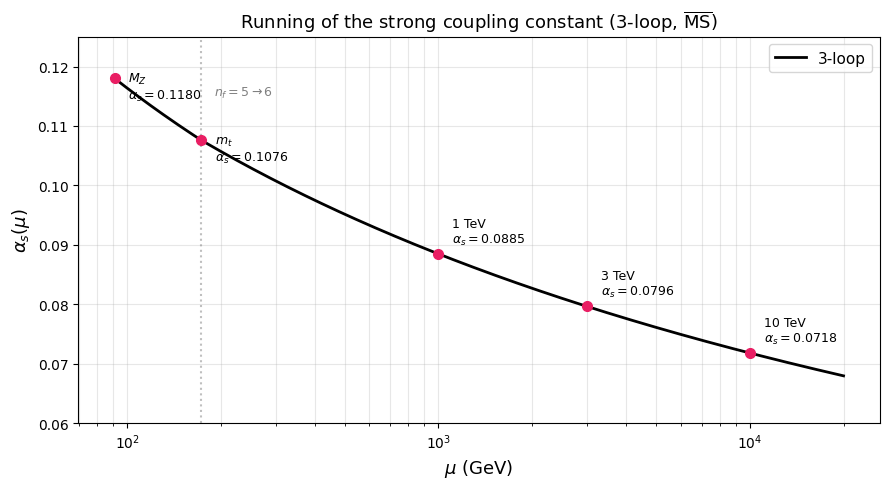

In [2]:
mu_values = np.logspace(np.log10(M_Z), np.log10(20000), 300)
a_s_3loop = alpha_s_array(mu_values, n_loops=3)

fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(mu_values, a_s_3loop, 'k-', linewidth=2, label='3-loop')

# Mark key scales
landmarks = {
    r'$M_Z$': M_Z,
    r'$m_t$': M_TOP,
    '1 TeV': 1000,
    '3 TeV': 3000,
    '10 TeV': 10000,
}
for label, mu in landmarks.items():
    a_val = alpha_s(mu)
    ax.plot(mu, a_val, 'o', color='#E91E63', markersize=7, zorder=5)
    offset = (10, 8) if mu > 500 else (10, -15)
    ax.annotate(f'{label}\n$\\alpha_s = {a_val:.4f}$',
                xy=(mu, a_val), xytext=offset, textcoords='offset points',
                fontsize=9, ha='left')

# Mark the top threshold
ax.axvline(M_TOP, color='gray', ls=':', alpha=0.5)
ax.text(M_TOP * 1.1, 0.115, '$n_f = 5 \\to 6$', fontsize=9, color='gray')

ax.set_xscale('log')
ax.set_xlabel(r'$\mu$ (GeV)', fontsize=13)
ax.set_ylabel(r'$\alpha_s(\mu)$', fontsize=13)
ax.set_title('Running of the strong coupling constant (3-loop, $\\overline{\\mathrm{MS}}$)', fontsize=13)
ax.set_ylim(0.06, 0.125)
ax.grid(True, alpha=0.3, which='both')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

## 2. Loop-order comparison

Compare 1-loop, 2-loop, 3-loop, and 4-loop running to see the perturbative convergence.

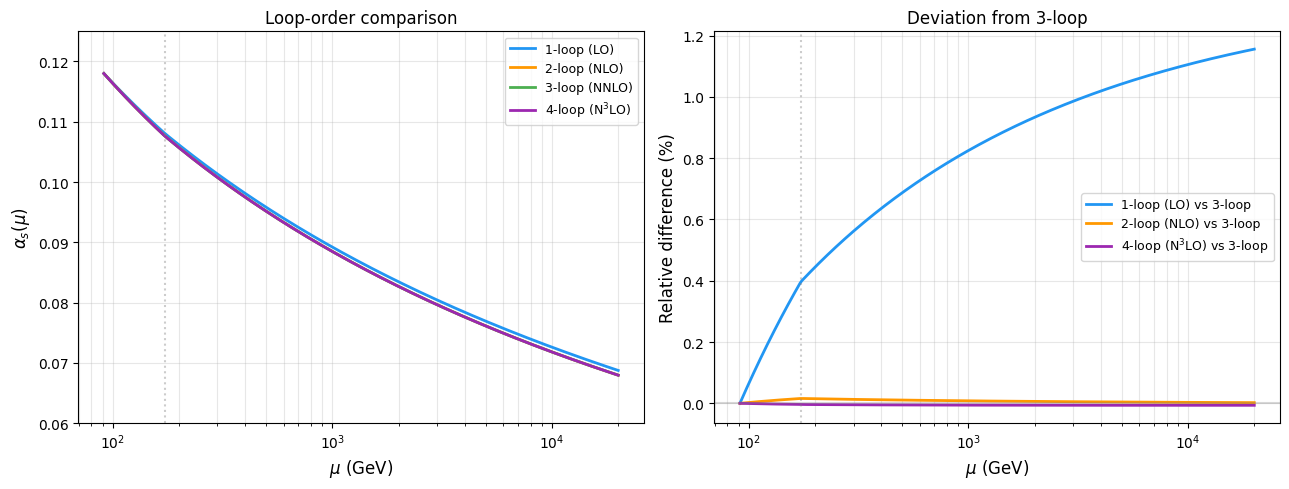

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

colors = {1: '#2196F3', 2: '#FF9800', 3: '#4CAF50', 4: '#9C27B0'}
labels = {1: '1-loop (LO)', 2: '2-loop (NLO)', 3: '3-loop (NNLO)', 4: '4-loop (N$^3$LO)'}

results = {}
for nl in [1, 2, 3, 4]:
    results[nl] = alpha_s_array(mu_values, n_loops=nl)
    ax1.plot(mu_values, results[nl], color=colors[nl], linewidth=2, label=labels[nl])

ax1.axvline(M_TOP, color='gray', ls=':', alpha=0.4)
ax1.set_xscale('log')
ax1.set_xlabel(r'$\mu$ (GeV)', fontsize=12)
ax1.set_ylabel(r'$\alpha_s(\mu)$', fontsize=12)
ax1.set_title('Loop-order comparison', fontsize=12)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3, which='both')
ax1.set_ylim(0.06, 0.125)

# Relative difference from 3-loop
for nl in [1, 2, 4]:
    rel_diff = (results[nl] - results[3]) / results[3] * 100
    ax2.plot(mu_values, rel_diff, color=colors[nl], linewidth=2, label=f'{labels[nl]} vs 3-loop')

ax2.axhline(0, color='gray', ls='-', alpha=0.3)
ax2.axvline(M_TOP, color='gray', ls=':', alpha=0.4)
ax2.set_xscale('log')
ax2.set_xlabel(r'$\mu$ (GeV)', fontsize=12)
ax2.set_ylabel('Relative difference (%)', fontsize=12)
ax2.set_title('Deviation from 3-loop', fontsize=12)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

## 3. $\alpha_s$ at RS-relevant scales

In Randall-Sundrum models, the KK scale $\Lambda_{\text{IR}}$ ranges from 1 to 10 TeV. The strong coupling at these scales enters the 2-loop neutron EDM calculation.

In [4]:
print(f"{'Scale':>14}  {'alpha_s (3-loop)':>16}  {'alpha_s (2-loop)':>16}")
print('-' * 52)
for mu, label in [(M_Z, 'M_Z'), (M_TOP, 'm_t'),
                   (1000, '1 TeV'), (2000, '2 TeV'), (3000, '3 TeV'),
                   (5000, '5 TeV'), (10000, '10 TeV')]:
    a3 = alpha_s(mu, n_loops=3)
    a2 = alpha_s(mu, n_loops=2)
    print(f'{label:>14}  {a3:>16.6f}  {a2:>16.6f}')

         Scale  alpha_s (3-loop)  alpha_s (2-loop)
----------------------------------------------------
           M_Z          0.118000          0.118000
           m_t          0.107637          0.107654
         1 TeV          0.088473          0.088480
         2 TeV          0.082682          0.082688
         3 TeV          0.079637          0.079642
         5 TeV          0.076109          0.076112
        10 TeV          0.071798          0.071800


## 4. $\alpha_s / \pi$ ratio

Many loop calculations use $\alpha_s/\pi$ as the expansion parameter. Let's see how small this is at TeV scales.

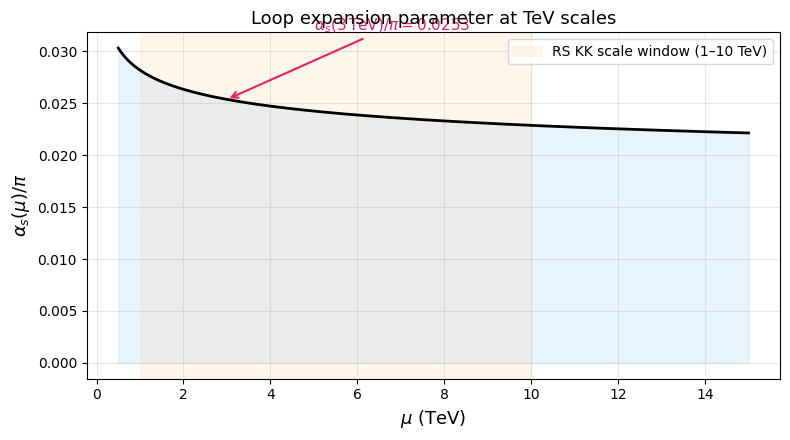

In [5]:
mu_tev = np.logspace(np.log10(500), np.log10(15000), 200)
a_s_tev = alpha_s_array(mu_tev, n_loops=3)

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.plot(mu_tev / 1000, a_s_tev / np.pi, 'k-', linewidth=2)
ax.fill_between(mu_tev / 1000, 0, a_s_tev / np.pi, alpha=0.1, color='#2196F3')

# Annotate the RS window
ax.axvspan(1, 10, alpha=0.08, color='#FF9800', label='RS KK scale window (1–10 TeV)')

ax.set_xlabel(r'$\mu$ (TeV)', fontsize=13)
ax.set_ylabel(r'$\alpha_s(\mu) / \pi$', fontsize=13)
ax.set_title(r'Loop expansion parameter at TeV scales', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Mark typical value
mu_3tev = 3000
a_3tev = alpha_s(mu_3tev) / np.pi
ax.annotate(f'$\\alpha_s(3\\,\\mathrm{{TeV}})/\\pi = {a_3tev:.4f}$',
            xy=(3, a_3tev), xytext=(5, 0.032),
            fontsize=11, color='#E91E63',
            arrowprops=dict(arrowstyle='->', color='#E91E63', lw=1.5))

plt.tight_layout()
plt.show()